In [ ]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


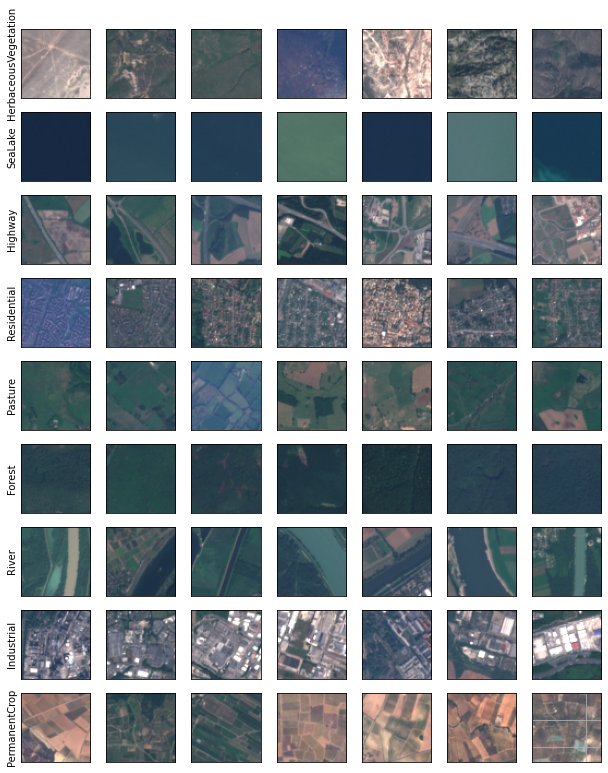

In [ ]:
train_path = r"/content/drive/My Drive/EUROSAT/train"
folders = os.listdir(train_path)
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))
for i,folder in enumerate(folders):
    path_folder = os.path.join(train_path, folder)
    imgs_list =os.listdir(path_folder)
    random.shuffle(imgs_list)
    for j in range(7):
        img_path = os.path.join(path_folder,imgs_list[j])
        plt.subplot(10,10,i*10+j+1)
        img = plt.imread(img_path)
        plt.imshow(img)
        #plt.axis("off")
        plt.tick_params(axis='both',which='both', bottom=False, top=False, left=False, right=False,
                        labelbottom=False, labelleft=False)
        if j==0:
            plt.ylabel(folder)
plt.grid('off')
plt.show()

In [ ]:
import os
import shutil
path_base="/content/drive/My Drive/EUROSAT" 

In [ ]:
import os
import numpy as np
%tensorflow_version 1.x
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras import optimizers

TensorFlow 1.x selected.


Using TensorFlow backend.


In [ ]:
train_path = os.path.join(path_base,'train')
val_path = os.path.join(path_base,'validation')
test_path = os.path.join(path_base,'test')

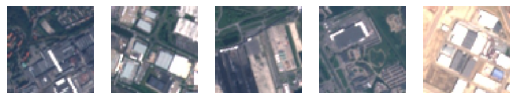

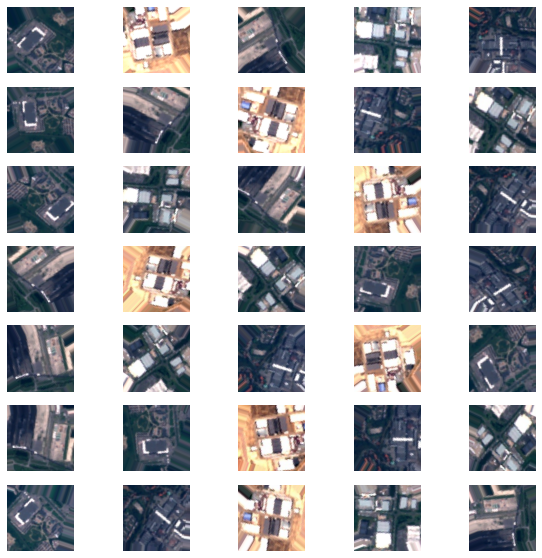

In [ ]:
# Mover cada uno de estos parametros, uno por uno para conocer su efecto en la imagen

datagen = ImageDataGenerator(rotation_range=90.0,width_shift_range=0.1,height_shift_range=0.1,
                             shear_range=0.2,zoom_range=0.1,horizontal_flip=True, fill_mode='nearest',
                             brightness_range=(0.5,1.2), vertical_flip=True)

from keras.preprocessing import image
import matplotlib.pyplot as plt

train_cats_dir = os.path.join(train_path, 'Industrial')

# Selección de las imagenes a transformar
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
import numpy as np 
plt.figure(figsize=(9, 30))
N = 5
X = np.zeros((N,150,150,3))
k = 0
for img_path in fnames[18:N+18]:
    img = image.load_img(img_path, target_size=(150, 150))     
    X[k,...] = image.img_to_array(img)                         
    plt.subplot(1,N,k+1)
    plt.imshow(X[k].astype(np.uint8))
    plt.axis('off')
    k += 1
plt.show()

# Generacion de imagenes transformadas: rotadas, volteadas, desplazadas, acercadas, rellenadas
plt.figure(figsize=(10, 10))
batch_size = 5
i = 0
for batch in datagen.flow(X, batch_size=batch_size): #Batch esta fijo 1 porque x solo tiene una imagen
    for j in range(batch_size):
        plt.subplot(7,batch_size,i*batch_size+j+1)
        plt.imshow(image.array_to_img(batch[j]))
        plt.axis('off')
    i += 1
    if i % 7 == 0:
        break
plt.show()

In [ ]:
batch_size=500
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
#!cp -r path/to/google_drive_data_dir/ path/to/colab_data_dir


#train_datagen = ImageDataGenerator(rotation_range=90.0,horizontal_flip=True, fill_mode='nearest',
#                             brightness_range=(0.5,1.2), vertical_flip=True, rescale=1./255)
#val_datagen = ImageDataGenerator(rotation_range=90.0,horizontal_flip=True, fill_mode='nearest',
#                             brightness_range=(0.5,1.2), vertical_flip=True, rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_path,
                                                   target_size=(64, 64),
                                                   batch_size=batch_size,
                                                   class_mode='categorical')
val_generator = val_datagen.flow_from_directory(val_path,
                                               target_size=(64, 64),
                                               batch_size=batch_size,
                                               class_mode='categorical')
test_generator = test_datagen.flow_from_directory(test_path,
                                               target_size=(64, 64),
                                               batch_size=batch_size,
                                               class_mode="categorical",
                                               shuffle=False)

Found 18000 images belonging to 9 classes.
Found 2400 images belonging to 9 classes.
Found 3600 images belonging to 9 classes.


In [ ]:
from keras.applications import MobileNetV2

In [ ]:
import numpy as np
from keras.applications import ResNet50
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers.core import Dropout

mobile_base =  MobileNetV2(weights='imagenet',include_top=False, pooling="avg",input_shape=(64, 64, 3))
mobile = Sequential()
mobile.add(mobile_base)
mobile.add(Dense(512, activation='relu'))
mobile.add(Dropout(0.4))
mobile.add(Dense(512, activation='relu'))
mobile.add(Dropout(0.3))
mobile.add(Dense(9, activation='softmax'))
mobile.summary()


#resnet50_base = ResNet50(weights='imagenet',include_top=False, pooling="avg",input_shape=(64, 64, 3))

#resnet50rock2 = Sequential()
#resnet50rock2.add(resnet50_base)
#resnet50rock2.add(Dense(256, activation='relu'))
#resnet50rock2.add(Dropout(0.3))
#resnet50rock2.add(Dense(256, activation='relu'))
#resnet50rock2.add(Dropout(0.3))
#resnet50rock2.add(Dense(9, activation='softmax'))
#resnet50rock2.summary()


/tensorflow-1.15.2/python3.6/keras_applications/mobilenet_v2.py:294: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 1280)              2257984   
_________________________________________________________________
dense_4 (Dense)              (None, 512)               655872    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 9)                 4617      
Total params: 3,181,129
Trainable params: 3,147,017
Non-trainable params: 34,112
_______________________________________

In [ ]:
### Congelando capas convolucionales
#print('Numero de tensores entrenables antes de congelar ResNet50 base:', len(resnet50rock2.trainable_weights))
#for layer in resnet50_base.layers:
#    layer.trainable = False
#print('Numero de tensores entrenables despues de congelar ResNet50 base:', len(resnet50rock2.trainable_weights))
#resnet50rock2.summary()
print('Numero de tensores entrenables antes de congelar ResNet50 base:', len(mobile_base.trainable_weights))
for layer in mobile_base.layers:
    layer.trainable = False
print('Numero de tensores entrenables despues de congelar ResNet50 base:', len(mobile.trainable_weights))
mobile.summary()

Numero de tensores entrenables antes de congelar ResNet50 base: 156
Numero de tensores entrenables despues de congelar ResNet50 base: 6
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 1280)              2257984   
_________________________________________________________________
dense_4 (Dense)              (None, 512)               655872    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 9)            

In [ ]:
from keras.callbacks import ModelCheckpoint
from keras import optimizers

#resnet50rock2.compile(loss='categorical_crossentropy', 
#                      optimizer='adam',
#                      metrics=['acc'])
mobile.compile(loss='categorical_crossentropy', 
                      optimizer='adam',
                      metrics=['acc'])
checkpointer = ModelCheckpoint(filepath=r"eurosat_resnet1.h5",
                              monitor='val_accuracy',
                              verbose=0,
                              save_best_only=True,
                              mode='max',
                              period=1)
historia = mobile.fit_generator(train_generator, 
                                     steps_per_epoch=18000//batch_size,
                                     epochs=300, 
                                     validation_data=val_generator,
                                     validation_steps=2400//batch_size,
                                     callbacks=[checkpointer])


Epoch 1/300
36/36 [==============================] - 26s 724ms/step - loss: 0.5810 - acc: 0.8069 - val_loss: 3.9419 - val_acc: 0.2225
Epoch 2/300
 2/36 [>.............................] - ETA: 2s - loss: 0.5031 - acc: 0.8260

/tensorflow-1.15.2/python3.6/keras/callbacks/callbacks.py:707: RuntimeWarning: Can save best model only with val_accuracy available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


36/36 [==============================] - 24s 679ms/step - loss: 0.4548 - acc: 0.8485 - val_loss: 4.0524 - val_acc: 0.2316
Epoch 3/300
36/36 [==============================] - 24s 677ms/step - loss: 0.3717 - acc: 0.8706 - val_loss: 3.9144 - val_acc: 0.2658
Epoch 4/300
36/36 [==============================] - 25s 689ms/step - loss: 0.3140 - acc: 0.8931 - val_loss: 3.9802 - val_acc: 0.2653
Epoch 5/300
36/36 [==============================] - 24s 670ms/step - loss: 0.2555 - acc: 0.9113 - val_loss: 4.0410 - val_acc: 0.2563
Epoch 6/300
36/36 [==============================] - 25s 688ms/step - loss: 0.2258 - acc: 0.9211 - val_loss: 3.9963 - val_acc: 0.2645
Epoch 7/300
36/36 [==============================] - 26s 720ms/step - loss: 0.2001 - acc: 0.9316 - val_loss: 3.9996 - val_acc: 0.2795
Epoch 8/300
36/36 [==============================] - 25s 683ms/step - loss: 0.1635 - acc: 0.9449 - val_loss: 4.4572 - val_acc: 0.3011
Epoch 9/300
36/36 [==============================] - 24s 666ms/step - loss

In [ ]:
historia

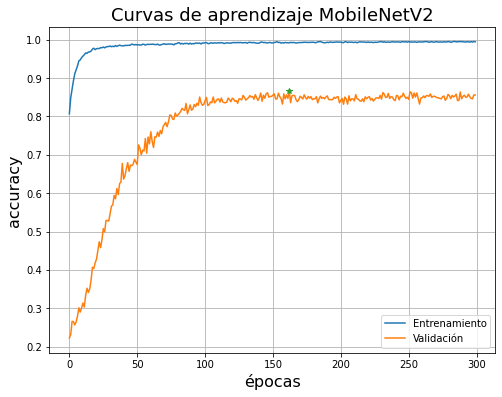

In [ ]:
import matplotlib.pyplot as plt

def learning_curves(h,titulo):
    plt.figure(figsize=(8,6))
    epoch_max = np.argmax(h.history['val_acc'])
    plt.plot(h.history["acc"], label='Entrenamiento')
    plt.plot(h.history["val_acc"], label='Validación')
    plt.legend(loc='lower right')
    plt.plot(epoch_max, h.history['val_acc'][epoch_max],'*')
    plt.xlabel('épocas',fontsize=16)
    plt.ylabel('accuracy',fontsize=16)
    plt.title(titulo,fontsize=18)
    #plt.ylim(0.5,1.03)
    plt.grid(True)
    plt.show()
    
learning_curves(historia,'Curvas de aprendizaje MobileNetV2')

In [ ]:
train_loss, train_acc = resnet50rock2.evaluate_generator(train_generator, steps=18000//batch_size)
print('train acc =', train_acc)
val_loss, val_acc = resnet50rock2.evaluate_generator(val_generator, steps=2400//batch_size)
print('val acc =', val_acc)
test_loss, test_acc = resnet50rock2.evaluate_generator(test_generator, steps=3600//batch_size)
print('test acc:', test_acc)

train acc = 1.0
val acc = 0.9265000224113464


/tensorflow-1.15.2/python3.6/keras/utils/data_utils.py:616: UserWarning: The input 0 could not be retrieved. It could be because a worker has died.
  UserWarning)
/tensorflow-1.15.2/python3.6/keras/utils/data_utils.py:616: UserWarning: The input 1 could not be retrieved. It could be because a worker has died.
  UserWarning)
/tensorflow-1.15.2/python3.6/keras/utils/data_utils.py:616: UserWarning: The input 2 could not be retrieved. It could be because a worker has died.
  UserWarning)
/tensorflow-1.15.2/python3.6/keras/utils/data_utils.py:616: UserWarning: The input 3 could not be retrieved. It could be because a worker has died.
  UserWarning)
/tensorflow-1.15.2/python3.6/keras/utils/data_utils.py:616: UserWarning: The input 4 could not be retrieved. It could be because a worker has died.
  UserWarning)
/tensorflow-1.15.2/python3.6/keras/utils/data_utils.py:616: UserWarning: The input 5 could not be retrieved. It could be because a worker has died.
  UserWarning)
/tensorflow-1.15.2/pyt

test acc: 0.9208571314811707


In [ ]:
import itertools
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes, tit, normalize=False):
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)
        title, fmt = 'Matriz de confusión normalizada', '.2f'
    else:
        title, fmt = tit, 'd'
    plt.figure(figsize=(10,8))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)#, fontsize=12)
    plt.colorbar(pad=0.05)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=40)
    plt.yticks(tick_marks, classes)
    thresh = cm.max()/2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),horizontalalignment="center", 
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('Clase Verdadera')#, fontsize=10)
    plt.xlabel('Clase Predicha')#, fontsize=10)
    plt.savefig(title+'.png')
    #plt.grid(b=None)
    plt.show()


In [ ]:
rocas  = os.listdir(train_path)

test_generator = val_datagen.flow_from_directory(test_path,
                                               target_size=(64, 64),
                                               batch_size=1,
                                               class_mode="categorical",
                                               shuffle=False)
predicted_classes = mobile.predict_generator(test_generator,steps=3600)
predicted_class_indices=np.rint(predicted_classes)
labels = (test_generator.class_indices)


Found 3600 images belonging to 9 classes.


In [ ]:
print(predicted_class_indices)
predictions = np.float32(predicted_class_indices.dot(range(9)))
print(predictions)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]
[0. 0. 1. ... 8. 8. 8.]


(3600,)
(3600,)


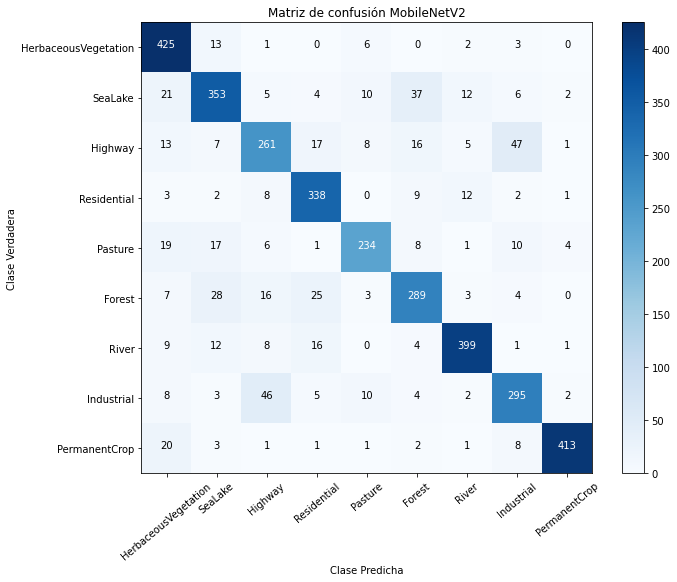

In [ ]:
predictions = np.asarray([k.dot(range(9)) for k in predicted_class_indices])
#predictions = np.asarray([list(labels.keys())[list(labels.values()).index(k)] for k in predicted_class_indices])
true_labels = np.asarray([k for k in test_generator.classes[0:3600]])
#true_labels = np.asarray([list(labels.keys())[list(labels.values()).index(k)] for k in test_generator.classes[0:3600]])
print(predictions.shape)
print(true_labels.shape)
cnf_matrix = confusion_matrix(true_labels, predictions, labels=[0,1,2,3,4,5,6,7,8])
tit = 'Matriz de confusión MobileNetV2'
plot_confusion_matrix(cnf_matrix, rocas, tit, normalize=False)
#print(predictions)

In [ ]:
pesos = [0.125, 0.125, 0.10416666666666667, 0.10416666666666667, 0.08333333333333333, 0.10416666666666667, 0.125, 0.10416666666666667, 0.125]

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
import seaborn as sns

def sens_spec(cls_names, y_true, y_pred, pesos):
  sensitivity = []
  specificity = []
  prec=[]
  fscore = []
  sd = []
  for i,name in enumerate(cls_names):
    TP = np.sum((y_true==name) & (y_pred==name))
    TN = np.sum((y_true!=name) & (y_pred!=name))
    FP = np.sum((y_true!=name) & (y_pred==name))
    FN = np.sum((y_true==name) & (y_pred!=name))
    sensitivity.append(TP/(TP+FN))
    specificity.append(FP/(TN+FP))
    prec.append(TP/(TP+FP))
    fscore.append(2*(prec[i]*sensitivity[i])/(prec[i]+sensitivity[i]))
  sensitivity.append(sensitivity[0]*pesos[0]+sensitivity[1]*pesos[1]+sensitivity[2]*pesos[2]+sensitivity[3]*pesos[3]
                     +sensitivity[4]*pesos[4]+sensitivity[5]*pesos[5]+sensitivity[6]*pesos[6]+sensitivity[7]*pesos[7]
                     +sensitivity[8]*pesos[8])
  specificity.append(specificity[0]*pesos[0]+specificity[1]*pesos[1]+specificity[2]*pesos[2]+specificity[3]*pesos[3]
                    +specificity[4]*pesos[4]+specificity[5]*pesos[5]+specificity[6]*pesos[6]+specificity[7]*pesos[7]
                    +specificity[8]*pesos[8])
  prec.append(prec[0]*pesos[0]+prec[1]*pesos[1]+prec[2]*pesos[2]+prec[3]*pesos[3]
             +prec[4]*pesos[4]+prec[5]*pesos[5]+prec[6]*pesos[6]+prec[7]*pesos[7]
             +prec[8]*pesos[8])
  fscore.append(fscore[0]*pesos[0]+fscore[1]*pesos[1]+fscore[2]*pesos[2]+fscore[3]*pesos[3]
               +fscore[4]*pesos[4]+fscore[5]*pesos[5]+fscore[6]*pesos[6]+fscore[7]*pesos[7]
               +fscore[8]*pesos[8])
  for i in range(len(cls_names)):
    sd.append(np.sqrt((sensitivity[i]-sensitivity[-1])**2))
  sd.append(0)
  return sensitivity, specificity, prec, fscore, sd

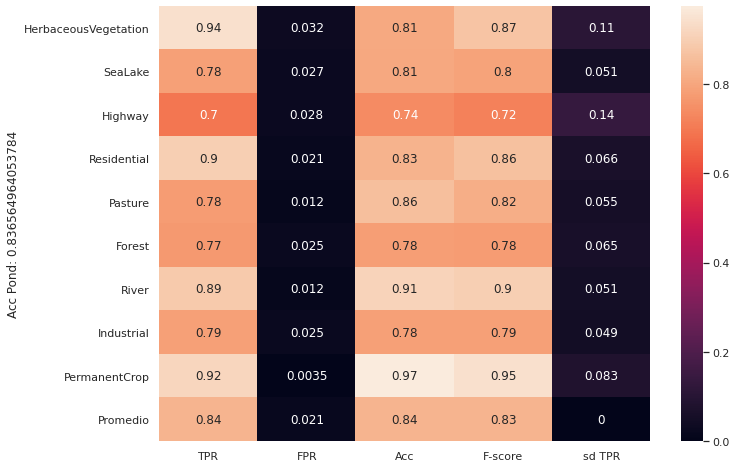

In [ ]:
import pandas as pd
sensitivity, FPR, prec, fscore, sd = sens_spec([0,1,2,3,4,5,6,7,8], np.asarray(true_labels), np.asarray(predictions),pesos)
d = {'TPR':sensitivity, 'FPR':FPR, 'Acc':prec, 'F-score':fscore, 'sd TPR':sd}
df = pd.DataFrame(d, index=['HerbaceousVegetation', 'SeaLake', 'Highway', 'Residential', 'Pasture', 'Forest', 'River', 'Industrial', 'PermanentCrop','Promedio'])#.transpose()
index = df.index
precprom=prec[0]*pesos[0]+prec[1]*pesos[1]+prec[2]*pesos[2]+prec[3]*pesos[3]+prec[4]*pesos[4]+prec[5]*pesos[5]+prec[6]*pesos[6]+prec[7]*pesos[7]+prec[8]*pesos[8]
index.name = 'Acc Pond: %s'%precprom

sns.set(rc={'figure.figsize':(11,8)})
sns.heatmap(df, annot=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


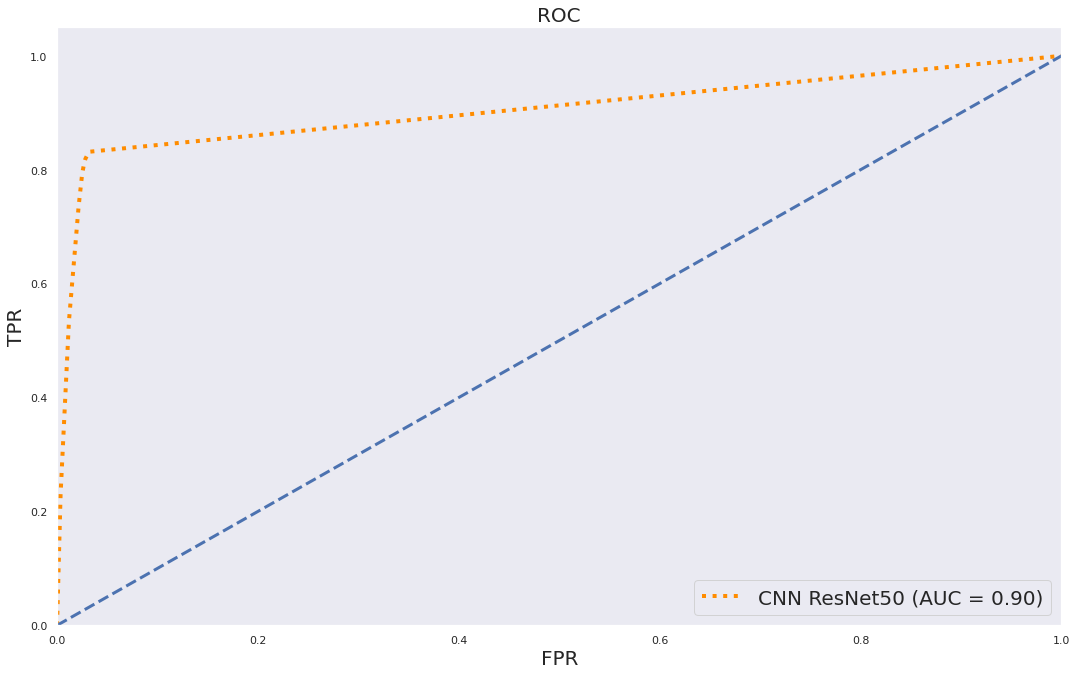

In [ ]:
# Compute ROC curve and ROC area for each class
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from scipy import interp
from sklearn.metrics import roc_auc_score

y_test_bin = label_binarize(true_labels, classes=range(9))
y_pred_bin = label_binarize(predictions, classes=range(9))
n_classes = 9

arbolfpr = dict()
arboltpr = dict()
arbolroc_auc = dict()
for i in range(n_classes):
    arbolfpr[i], arboltpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    arbolroc_auc[i] = auc(arbolfpr[i], arboltpr[i])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([arbolfpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, arbolfpr[i], arboltpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

arbolfpr["macro"] = all_fpr
arboltpr["macro"] = mean_tpr
arbolroc_auc["macro"] = auc(arbolfpr["macro"], arboltpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(18,11))
lw = 3

plt.plot(arbolfpr["macro"], arboltpr["macro"],
         label='CNN ResNet50 (AUC = {0:0.2f})'
               ''.format(arbolroc_auc["macro"]),
         color='darkorange', linestyle=':', linewidth=4)

plt.plot([0, 1], [0, 1], 'b--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR', fontsize=20)
plt.ylabel('TPR', fontsize=20)
plt.title('ROC', fontsize=20)
plt.legend(loc="lower right", fontsize=20)
plt.grid()
plt.show()

In [ ]:
print(arbolfpr["macro"])

[0.         0.00349206 0.01151515 0.01206349 0.02139535 0.0248062
 0.02511628 0.02698413 0.02821705 0.03174603 1.        ]


In [ ]:
print(arboltpr["macro"])

[0.         0.22972251 0.52329791 0.53924899 0.73461902 0.79010057
 0.79408208 0.81161103 0.81922943 0.83148634 1.        ]


In [ ]:
print(arbolroc_auc["macro"])

0.9045924583599002


## Visualización de los errores

In [ ]:
# Inspección visual de los errores
from random import sample 
from math import ceil

def common(a,b): 
    c = [value for value in a if value in b] 
    return c

def correct_path(incorrect,nimgs,paths):
    n=0
    for i in range(len(nimgs)):
        if  incorrect < nimgs[i]+n and incorrect>=n:
            number = incorrect-n
            break
        n += nimgs[i]
    return paths[i], i, number

def create_paths(test_path, rocas):
    prin_index = []
    paths = []
    nimgs = []
    for i, rock in enumerate(rocas):
        paths.append(os.path.join(test_path,rock))
        nimgs.append(len(os.listdir(paths[i])))
        list_names = os.listdir(paths[i])
        numb =[]
        for j, name in enumerate(list_names):
            numb.append(name.split(rock+'_')[1].split('.')[0])
        prin_index.append(int(min(numb)))
    return prin_index, nimgs, paths
  
def shuffled_incorrect_index(incorrect_indices, nimgs, randimgs):
    incorrect_indices2 = []
    n=0
    for i in range(len(nimgs)):
        lista1 = np.where(incorrect_indices>=n)[0].tolist()
        lista2 = np.where(incorrect_indices<nimgs[i]+n)[0].tolist()
        c = common(lista1,lista2)
        try:
            lista =sample(c,randimgs)
        except:
            lista = c
        n += nimgs[i]
        incorrect_indices2 += lista
    col = 5
    f = ceil(len(incorrect_indices2)/col)
    return incorrect_indices2, f, col

def incorrect_images(test_path, rocas, predicted_class_indices, predictions, test_generator, true_labels,
                     num_imgs=400, randimgs=7):
    incorrect_indices = np.nonzero(predictions != test_generator.classes[0:num_imgs])[0]
    prin_index, nimgs, paths = create_paths(test_path, rocas)
    incorrect_indices2, f, col = shuffled_incorrect_index(incorrect_indices, nimgs, randimgs)
    plt.figure(figsize=(16,13))
    for i, incorrect in enumerate(incorrect_indices2):
        inc = incorrect_indices[incorrect]
        plt.subplot(f,col,i+1)
        pathi, index, number = correct_path(inc,nimgs,paths)
        name = rocas[index]+'_'+str(prin_index[index]+number)+'.jpg'
        img = plt.imread(os.path.join(pathi,name))
        plt.imshow(img)
        plt.title("P={}, C={}".format(predictions[inc], true_labels[inc]))
        plt.xticks([])
        plt.yticks([])
    plt.tight_layout()
    plt.show()
    

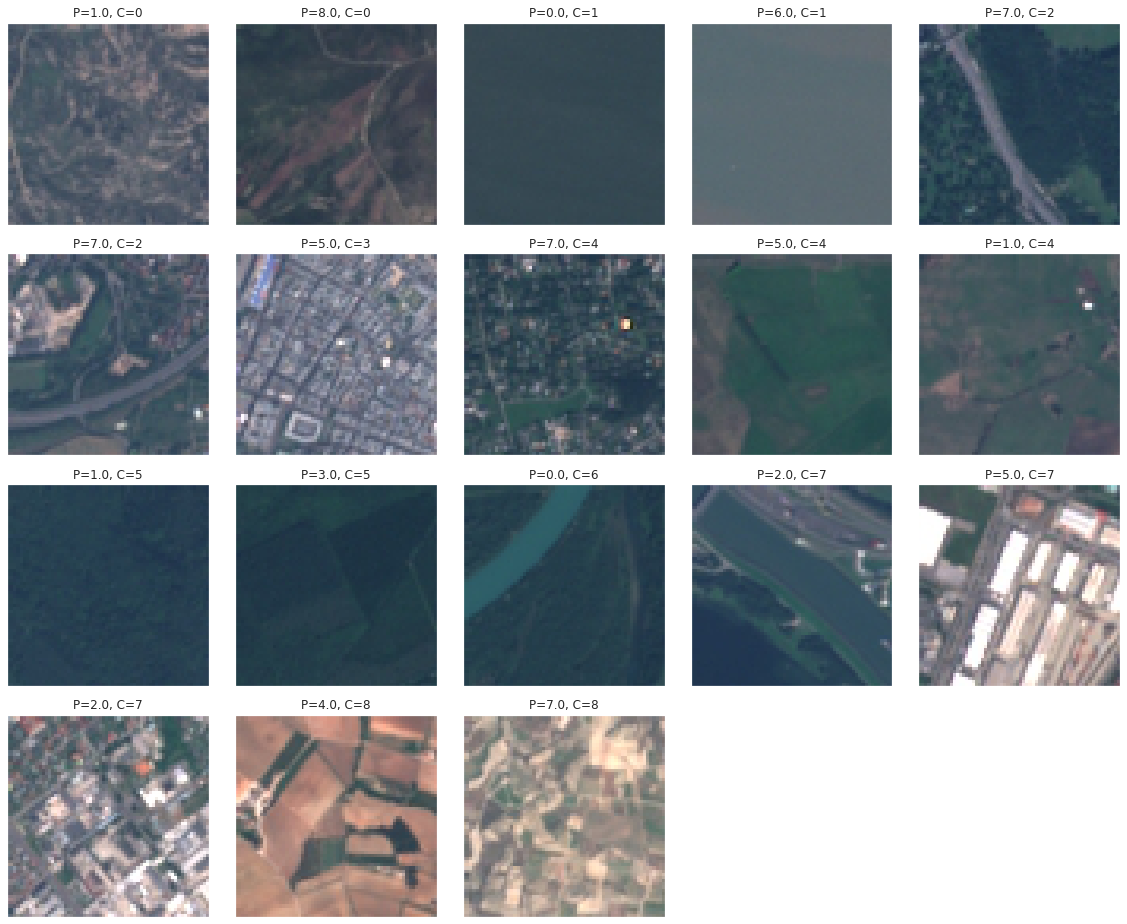

In [ ]:
rocas = ['HerbaceousVegetation', 'SeaLake', 'Highway', 'Residential', 'Pasture', 'Forest', 'River', 'Industrial', 'PermanentCrop']
incorrect_images(test_path, rocas, predicted_class_indices, predictions, test_generator, true_labels,
                     num_imgs=3600, randimgs=2)